In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score


from sklearn.linear_model import RidgeCV, Ridge
import numpy as np
from sklearn.datasets import make_regression



from csv_reader import *

       instant  season  yr  mnth  hr  holiday  weekday  workingday  \
7445      7446       4   0    11  20        1        5           0   
13512    13513       3   1     7   5        0        0           0   
6158      6159       3   0     9   4        0        1           1   
13205    13206       3   1     7  10        0        1           1   
1616      1617       1   0     3  20        0        6           0   
...        ...     ...  ..   ...  ..      ...      ...         ...   
10955    10956       2   1     4  15        0        5           1   
17289    17290       1   1    12   6        0        5           1   
5192      5193       3   0     8   6        0        2           1   
12172    12173       2   1     5   9        0        0           0   
235        236       1   0     1   2        0        2           1   

       weathersit  temp   atemp   hum  windspeed  
7445            1  0.32  0.3182  0.39     0.1940  
13512           1  0.60  0.5455  0.88     0.0000  
6158  

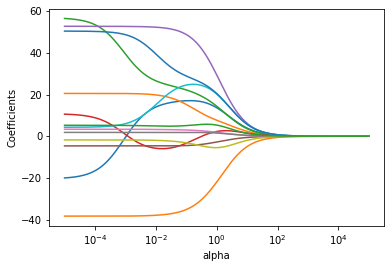

In [12]:
bike_sharing_df = get_bike_sharing_df()
bike_sharing_df.columns

Y = bike_sharing_df.cnt
X = bike_sharing_df.loc[:].drop(columns=["dteday", "casual","registered","cnt"])



X_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 1)
print(X_train)

n_folds = 5
n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas) #grid search for lambda (aka 'alpha')

parameters = { 'ridge__alpha':alphas}

scaler = StandardScaler()
ridge = Ridge(normalize=True,tol=2,fit_intercept=True) #we will pass through alpha values later
pipe = make_pipeline(scaler, ridge)

gs = GridSearchCV(pipe, parameters, scoring='neg_mean_squared_error', cv=n_folds)
gs.fit(X_train,y_train)

alphas = np.logspace(-5, 5, n_alphas) #grid search for lambda (aka 'alpha')

coefs = []
# print(pipe.get_params().keys()) #reports input names can set (look for the hyper-parameters)
parameters = {'ridge__alpha':alphas}
# model = GridSearchCV(pipe, parameters, scoring='neg_mean_squared_error', cv=n_folds)
# model.fit(X_train,y_train)
for a in alphas:
    pipe.set_params(ridge__alpha=a)
    pipe.fit(X_train, y_train)
    coefs.append(pipe.named_steps['ridge'].coef_)

plt.figure()
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')

plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients');


# plt.figure()
# ax = plt.gca()
# ax.plot(alphas, coefs,'o')
# ax.set_xscale('log')
#
# plt.axis('tight')
# plt.xlabel('alpha')
# plt.ylabel('Coefficients')
# plt.title('Zoomed in')
# plt.xlim(.01,100)


In [13]:
# coefficients {𝛽1,…,𝛽𝑝} for the last fitted model in the above for loop
pipe.named_steps['ridge'].coef_

array([ 4.89877897e-04,  3.12936329e-04,  4.39586838e-04,  2.12545798e-04,
        7.08538990e-04, -6.69623759e-05,  4.61428692e-05,  5.15880306e-05,
       -2.50577174e-04,  7.17527456e-04,  7.14296105e-04, -5.73945874e-04,
        1.63413572e-04])

In [8]:
# B0
pipe.named_steps['ridge'].intercept_

188.19144550373616

In [9]:
# Average of Y's
np.mean(y_train)

188.19144550373616

In [10]:
# Best alpha
best_alpha = gs.best_params_['ridge__alpha']
print(best_alpha)

0.00325508859983506


In [11]:
scaler = StandardScaler()
ridge = Ridge(alpha=best_alpha,normalize=False,fit_intercept=True) #we will pass through alpha values later
pipe = make_pipeline(scaler, Ridge)
pipe.fit(X_train, y_train)

best_coef_ridge = pipe.named_steps['ridge'].coef_

# print('The final set of coefficients: ')
print(best_coef_ridge)

TypeError: fit() missing 1 required positional argument: 'y'

In [ ]:
print('\nCoefficients  [ridge]')
for i in range(0,13):
    print('   Feature %2i:  %.2f'%(i,\
                    best_coef_ride[i]))

In [ ]:


print(bike_sharing_df.columns)





lm = sm.OLS(y_train, sm.add_constant(x_train)).fit()

y_train_pred = lm.predict(sm.add_constant(x_train))
y_test_pred = lm.predict(sm.add_constant(x_test))

print('Train Score: ')
print(r2_score(y_train, y_train_pred))

print('\nTest Score: ')
print(r2_score(y_test, y_test_pred))